In [1]:
# 1. Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import pandas as pd  
import numpy as np   

import seaborn as sns   
from scipy import stats   
from scipy.stats import kurtosis, skew   

import matplotlib
import matplotlib.pyplot as plt   

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
df_cleaned = pd.read_json('as24_cars.json')  

In [3]:
df_cleaned1 = df_cleaned.copy()   

In [4]:
df_cleaned1.head().T 

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]","[\n, A 35 AMG ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-","€ 46,990.-","€ 16,800.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [5]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [6]:
# Calculate the percentage of missing values in columns        
missing_values = df_cleaned1.isnull().sum() / len(df_cleaned1) * 100
print(missing_values.sort_values(ascending=False))

# Check data types
print(df_cleaned1.dtypes)

# View the first few rows
print(df_cleaned1.head())


Battery Ownership            99.976255
Power consumption (WLTP)     99.945726
Electric Range (WLTP)        99.945726
Fuel consumption (WLTP)      99.660787
CO₂-emissions (WLTP)         99.606513
Availability                 98.978969
Available from               98.666893
Taxi or rental car           98.568521
Power consumption            98.253053
Last timing belt change      98.059701
Last service                 93.205563
Other fuel types             92.154003
Production date              79.959294
CO₂-efficiency               73.527815
Energy efficiency class      73.527815
Model code                   71.618046
Emissions sticker            68.066486
Non-smoker vehicle           60.671642
General inspection           58.432836
Full service history         57.377883
Previous owner               52.459294
Paint                        50.831072
Upholstery colour            50.580054
Warranty                     46.458616
Country version              42.710312
Drivetrain               

In [7]:
# Snake case conversion   
df_cleaned1.columns = (
    df_cleaned1.columns
    .str.strip()  # Remove leading and trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace(r"[^\w\s]", "", regex=True)  # Remove special characters
    .str.replace(r"\s+", "_", regex=True)  # Replace spaces with underscores
)


In [8]:
df_cleaned1.columns 

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co₂emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'nonsmoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co₂efficiency',
       'fuel_consumption_wltp', 'co₂emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_

In [9]:
def rename_columns(df_cleaned1: pd.DataFrame, old_columns: list, new_columns: list) -> pd.DataFrame: # 9.
    """
    Updates the column names of a DataFrame using given old and new column names.

    Args:
        df_cleaned1 (pd.DataFrame): The DataFrame to be updated.
        old_columns (list): List of old column names.
        new_columns (list): List of new column names.

    Returns:
        pd.DataFrame: DataFrame with updated column names.
    """
    # Create a dictionary mapping old column names to new column names
    column_mapping = dict(zip(old_columns, new_columns))

    # Update the column names in the DataFrame
    df_cleaned1 = df_cleaned1.rename(columns=column_mapping)

    return df_cleaned1

# Define the old and new column names as needed
old_columns = [
    'make_model', 'short_description', 'make', 'model', 'location', 'price', 
    'body_type', 'type', 'doors', 'country_version', 'offer_number', 
    'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type', 
    'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 
    'gears', 'co₂emissions', 'manufacturer_colour', 'drivetrain', 
    'cylinders', 'fuel_consumption', 'comfort_convenience', 
    'entertainment_media', 'safety_security', 'extras', 'empty_weight', 
    'model_code', 'general_inspection', 'last_service', 
    'full_service_history', 'nonsmoker_vehicle', 'emission_class', 
    'emissions_sticker', 'upholstery_colour', 'upholstery', 'production_date', 
    'previous_owner', 'other_fuel_types', 'power_consumption', 
    'energy_efficiency_class', 'co₂efficiency', 'fuel_consumption_wltp', 
    'co₂emissions_wltp', 'available_from', 'taxi_or_rental_car', 'availability', 
    'last_timing_belt_change', 'electric_range_wltp', 'power_consumption_wltp', 
    'battery_ownership'
]

new_columns = [
    'make_model_ordinal', 'short_description', 'make', 'model', 'location',
    'price', 'body_type', 'type', 'doors', 'country_version',
    'offer_number', 'warranty', 'mileage', 'age', 'gearbox', 'fuel_type',
    'colour', 'paint', 'desc', 'seller', 'seats', 'power_kW', 'engine_size',
    'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
    'cylinders', 'fuel_consumption', 'comfort__convenience_package_test',
    'entertainment__media_package_labeled_test', 'safety_security_package_labeled_test', 'extras', 'empty_weight',
    'model_code', 'general_inspec', 'last_service', 'full_service_history',
    'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
    'upholstery_colour', 'upholstery', 'production_date', 'previous_owner',
    'other_fuel_types', 'power_consumption', 'energy_efficiency_class',
    'co₂_efficiency', 'fuel_consumption_wltp', 'co₂_emissions_wltp',
    'available_from', 'taxi_or_rental_car', 'availability',
    'last_timing_belt_change', 'electric_range_wltp',
    'power_consumption_wltp', 'battery_ownership'
]

# Update column names
df_cleaned1 = rename_columns(df_cleaned1, old_columns, new_columns)

# Check the new column names
print(df_cleaned1.columns)


Index(['make_model_ordinal', 'short_description', 'make', 'model', 'location',
       'price', 'body_type', 'type', 'doors', 'country_version',
       'offer_number', 'warranty', 'mileage', 'age', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power_kW', 'engine_size',
       'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort__convenience_package_test',
       'entertainment__media_package_labeled_test',
       'safety_security_package_labeled_test', 'extras', 'empty_weight',
       'model_code', 'general_inspec', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery_colour', 'upholstery', 'production_date', 'previous_owner',
       'other_fuel_types', 'power_consumption', 'energy_efficiency_class',
       'co₂_efficiency', 'fuel_consumption_wltp', 'co₂_emissions_wltp',
       'available_from', 'taxi_or_rental_car', 'availab

In [10]:
def process_car_data(df_cleaned1):
    """
    Cleans the production_date column in df_cleaned1 and 
    writes the calculated age values directly into this column.
    """
    # Define the current year
    current_year = 2022

    # Clean the production_date column values
    def clean_production_date(value):
        try:
            # If the value is numeric and, for example, like 20190.0, take the first 4 digits
            if isinstance(value, (float, int)) and not pd.isna(value):
                cleaned_value = int(str(int(value))[:4])  # Take the first 4 digits and return as an integer
                if 1900 <= cleaned_value <= current_year:  # Logical year range check
                    return current_year - cleaned_value  # Calculate the age
                return np.nan  # Return NaN for illogical years
            return np.nan  # Return NaN for missing or invalid values
        except:
            return np.nan

    # Clean the production_date column and permanently write the ages
    df_cleaned1['production_date'] = df_cleaned1['production_date'].apply(clean_production_date)

    return df_cleaned1

# Call the function
df_cleaned1 = process_car_data(df_cleaned1)


In [11]:
# Cell Flattening and Cleaning                      
def flatten_value(value):
    """
    Flattens the data in a single cell and removes unnecessary characters.
    """
    if isinstance(value, list):  # If the value is a list
        value = " ".join(map(str, value))  # Flatten the list
    elif isinstance(value, str):  # If the value is already a string
        value = value.strip()

    # List of unnecessary characters to remove
    to_replace = [
        "kw/", "km", ",", "g/", "l/100", "()", "(comb)", "(,)", "'", ".", 
        "\n", "€", "[", "]", "\\n", "\t", "cc", "kg", "hp"
    ]

    # Process the value as a string
    value = str(value)
    for item in to_replace:
        value = value.replace(item, "")  # Remove each item

    # Check for NaN values and convert to NaN
    if value.lower() in ["nan", "none", "null"] or pd.isna(value):
        return np.nan

    return value.strip()


In [12]:
df_cleaned1 = df_cleaned1.applymap(flatten_value) 

In [13]:

df_cleaned1['price'] = df_cleaned1['price'].str.replace(r'[^0-9,]', '', regex=True)  # Retain only numbers and commas


In [14]:
# Convert variations of 'nan', 'NaN', 'NAN', and empty expressions to NaN in all columns
for column in df_cleaned1.columns:
    print(f"--- Processing column: {column} ---")
    
    # Print the count of missing values before cleaning
    missing_count_before = df_cleaned1[column].isna().sum()
    print(f"Initially, {missing_count_before} missing values in column: {column}.")
    
    # Convert variations like 'nan', 'NaN', 'NAN' to NaN
    df_cleaned1[column] = df_cleaned1[column].replace(
        to_replace=[r'(?i)nan'], 
        value=np.nan, 
        regex=True
    )

    # Convert empty lists, sets, and None to NaN
    df_cleaned1[column] = df_cleaned1[column].replace(
        to_replace=['None', '[]', '{}', '()'],
        value=np.nan
    )
    
    # Print the count of NaN values after cleaning
    nan_count = df_cleaned1[column].isna().sum()
    print(f"Total {nan_count} NaN values in column: {column}.")
    

print("\n--- Cleaning process completed ---")


--- Processing column: make_model_ordinal ---
Initially, 850 missing values in column: make_model_ordinal.
Total 850 NaN values in column: make_model_ordinal.
--- Processing column: short_description ---
Initially, 850 missing values in column: short_description.
Total 868 NaN values in column: short_description.
--- Processing column: make ---
Initially, 850 missing values in column: make.
Total 850 NaN values in column: make.
--- Processing column: model ---
Initially, 850 missing values in column: model.
Total 850 NaN values in column: model.
--- Processing column: location ---
Initially, 850 missing values in column: location.
Total 1074 NaN values in column: location.
--- Processing column: price ---
Initially, 850 missing values in column: price.
Total 850 NaN values in column: price.
--- Processing column: body_type ---
Initially, 850 missing values in column: body_type.
Total 850 NaN values in column: body_type.
--- Processing column: type ---
Initially, 850 missing values in c

Total 29473 NaN values in column: battery_ownership.

--- Cleaning process completed ---


In [15]:
def process_car_data(df_cleaned1):
    # Convert the 'age' column to string type to use the .str method
    df_cleaned1['age'] = df_cleaned1['age'].astype(str)
    
    # Extract years and calculate car ages (based on the year 2022)
    df_cleaned1['age'] = df_cleaned1['age'].str.extract(r'/(\d{4})')[0]  # Extract the year part
    
    # Subtract from 2022 and handle NaN values
    df_cleaned1['age'] = 2022 - pd.to_numeric(df_cleaned1['age'], errors='coerce')
    
    return df_cleaned1

# Example usage
df_cleaned1 = process_car_data(df_cleaned1)


In [16]:
def process_last_service(df_cleaned1):
    """
    Processes the date information in the last_service column and calculates age.
    Assumes the 'current year' as 2022.
    """
    # Define the current year
    current_year = 2022

    # Convert the 'last_service' column to string type
    df_cleaned1['last_service'] = df_cleaned1['last_service'].astype(str)
    
    # Extract years and calculate the age of last_service
    df_cleaned1['last_service'] = df_cleaned1['last_service'].str.extract(r'/(\d{4})')[0]  # Extract the year part
    
    # Subtract from 2022 and handle NaN values
    df_cleaned1['last_service'] = current_year - pd.to_numeric(df_cleaned1['last_service'], errors='coerce')
    
    return df_cleaned1


# Call the function
df_cleaned1 = process_last_service(df_cleaned1)


In [17]:
def process_general_inspec(df_cleaned1):
    """
    Processes the date information in the general_inspec column and calculates age.
    The value 'New' is assumed to represent the year 2022. The current year is also considered as 2022.
    Positive values are calculated for future years.
    """
    # Define the current year
    current_year = 2022

    # Convert the 'general_inspec' column to string type
    df_cleaned1['general_inspec'] = df_cleaned1['general_inspec'].astype(str)
    
    # Replace the "New" value with the year 2022
    df_cleaned1['general_inspec'] = df_cleaned1['general_inspec'].replace('New', '2022')

    # Extract years and calculate the age of general_inspec
    df_cleaned1['general_inspec'] = df_cleaned1['general_inspec'].str.extract(r'/(\d{4})')[0]  # Extract the year part
    
    # Subtract from 2022 and process positive values
    df_cleaned1['general_inspec'] = abs(current_year - pd.to_numeric(df_cleaned1['general_inspec'], errors='coerce'))
    
    return df_cleaned1

# Call the function
df_cleaned1 = process_general_inspec(df_cleaned1)


In [18]:
def process_general_inspec(df_cleaned1):
    """
    Processes the general_inspec column.
    Extracts date information and calculates ages.
    """
    # Convert the 'general_inspec' column to string type
    df_cleaned1['general_inspec'] = df_cleaned1['general_inspec'].astype(str)
    
    # Extract years and calculate the age of general_inspec (based on the year 2022)
    df_cleaned1['general_inspec'] = df_cleaned1['general_inspec'].str.extract(r'(\d{4})')[0]  # Extract the year part
    
    # Subtract from 2022 and handle NaN values
    df_cleaned1['general_inspec'] = 2022 - pd.to_numeric(df_cleaned1['general_inspec'], errors='coerce')
    
    return df_cleaned1


In [19]:
def extract_first_number(df_cleaned1, column_name):
    """
    Extracts the first numeric value from each row in the specified column and removes the rest.
    
    Args:
        df_cleaned1 (DataFrame): The pandas DataFrame to be processed.
        column_name (str): The target column name.

    Returns:
        DataFrame: The processed DataFrame.
    """
    if column_name in df_cleaned1.columns:
        # Use pandas str.extract with regex to extract the first number
        df_cleaned1[column_name] = df_cleaned1[column_name].astype(str).str.extract(r'(\d+)')
        # Convert the results to numeric, preserving NaN values
        df_cleaned1[column_name] = pd.to_numeric(df_cleaned1[column_name], errors='coerce')
    else:
        raise KeyError(f"Error: Column '{column_name}' not found in the DataFrame!")
    
    return df_cleaned1

# Apply the function to the 'power_kW', 'warranty', and 'co_emissions' columns
df_cleaned1 = extract_first_number(df_cleaned1, 'power_kW')
df_cleaned1 = extract_first_number(df_cleaned1, 'warranty')
df_cleaned1 = extract_first_number(df_cleaned1, 'co_emissions')

# Check the results
print(df_cleaned1[['power_kW', 'warranty', 'co_emissions']].head())


   power_kW  warranty  co_emissions
0       NaN      24.0           NaN
1     215.0      24.0           0.0
2     310.0      12.0           NaN
3     225.0      12.0           NaN
4     100.0      12.0           NaN


In [20]:
def clean_and_format_dataframe(df_cleaned1, columns_to_fill_with_zero):
    """
    Cleans and formats the DataFrame. Converts non-numeric values to NaN and leaves NaN values unchanged.
    
    Args:
        df_cleaned1 (DataFrame): The DataFrame to be cleaned.
        columns_to_fill_with_zero (list): List of columns to process as numeric.

    Returns:
        DataFrame: Cleaned and formatted DataFrame.
    """
    # Process and format numeric columns
    for column_name in df_cleaned1.columns:
        print(f"--- Processing Column: {column_name} ---")
        
        if column_name in columns_to_fill_with_zero:
            print(f"Column {column_name} is numeric, cleaning and formatting...")
            
            # Replace non-numeric values with NaN
            df_cleaned1[column_name] = pd.to_numeric(df_cleaned1[column_name], errors='coerce')
            
            # Format numeric columns to three decimal places (NaN values remain unaffected)
            df_cleaned1[column_name] = df_cleaned1[column_name].apply(
                lambda x: '{:.3f}'.format(x) if pd.notna(x) else x
            )
        else:
            print(f"Column {column_name} is not numeric, no processing applied.")

    return df_cleaned1

# Example usage
columns_to_fill_with_zero = [
    'age', 'cylinders', 'co_emissions', 'doors', 'empty_weight', 
    'engine_size', 'fuel_consumption', 'fuel_consumption_wltp', 
    'gears', 'mileage', 'price', 'power_kW', 'seats', 'warranty', 
    'co_emissions'
]  # Columns to process as numeric

df_cleaned1 = clean_and_format_dataframe(df_cleaned1, columns_to_fill_with_zero)


--- Processing Column: make_model_ordinal ---
Column make_model_ordinal is not numeric, no processing applied.
--- Processing Column: short_description ---
Column short_description is not numeric, no processing applied.
--- Processing Column: make ---
Column make is not numeric, no processing applied.
--- Processing Column: model ---
Column model is not numeric, no processing applied.
--- Processing Column: location ---
Column location is not numeric, no processing applied.
--- Processing Column: price ---
Column price is numeric, cleaning and formatting...
--- Processing Column: body_type ---
Column body_type is not numeric, no processing applied.
--- Processing Column: type ---
Column type is not numeric, no processing applied.
--- Processing Column: doors ---
Column doors is numeric, cleaning and formatting...
--- Processing Column: country_version ---
Column country_version is not numeric, no processing applied.
--- Processing Column: offer_number ---
Column offer_number is not num

In [21]:
def null_value_analysis(df_cleaned1):
    """
    Calculates the count and percentage of null (NaN) values for each column in the DataFrame.
    
    Args:
        df_cleaned1 (DataFrame): The pandas DataFrame to be analyzed.
    
    Returns:
        DataFrame: A summary DataFrame containing the count and percentage of null values.
    """
    # Calculate the count and percentage of null values
    null_info = df_cleaned1.isnull().agg(['sum', 'mean']).T
    null_info.columns = ['null_count', 'null_percentage']
    
    # Multiply the null percentage by 100
    null_info['null_percentage'] = null_info['null_percentage'] * 100
    
    return null_info

# Example usage
null_summary = null_value_analysis(df_cleaned1)
null_summary


,null_count,null_percentage
make_model_ordinal,850.0,2.883311
short_description,868.0,2.944369
make,850.0,2.883311
model,850.0,2.883311
location,1074.0,3.643148
price,850.0,2.883311
body_type,850.0,2.883311
type,850.0,2.883311
doors,1209.0,4.101085
country_version,12591.0,42.710312


In [22]:
null_value_analysis(df_cleaned1)

,null_count,null_percentage
make_model_ordinal,850.0,2.883311
short_description,868.0,2.944369
make,850.0,2.883311
model,850.0,2.883311
location,1074.0,3.643148
price,850.0,2.883311
body_type,850.0,2.883311
type,850.0,2.883311
doors,1209.0,4.101085
country_version,12591.0,42.710312


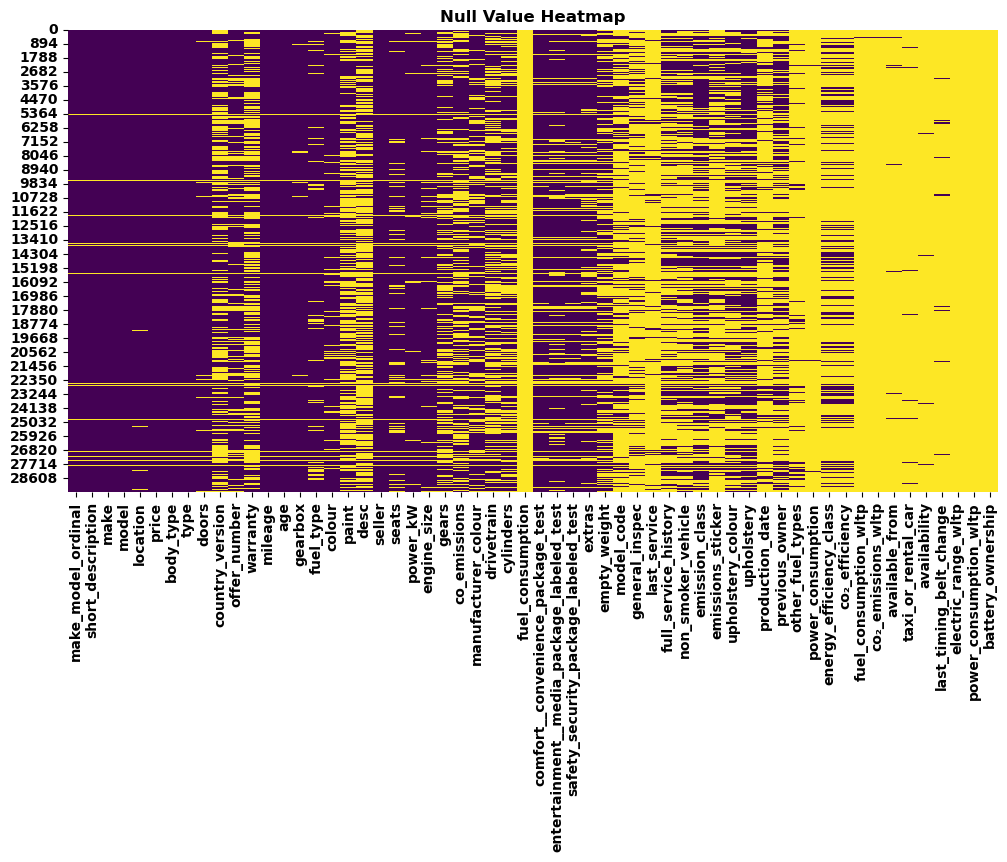

In [23]:
def visualize_null_values(df_cleaned1):
    # Visualization of null values
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_cleaned1.isnull(), cbar=False, cmap='viridis')
    plt.title('Null Value Heatmap')
# plt.show()
visualize_null_values(df_cleaned1);

In [24]:
def analyze_null_threshold(df_cleaned1, threshold=80):
    # Find columns where the null value percentage exceeds the threshold
    null_analysis = null_value_analysis(df_cleaned1)
    high_null_columns = null_analysis[null_analysis['null_percentage'] > threshold]
    
    return high_null_columns

x = analyze_null_threshold(df_cleaned1, threshold=80)
print(x)


                         null_count  null_percentage
fuel_consumption            29480.0       100.000000
last_service                27477.0        93.205563
other_fuel_types            27167.0        92.154003
power_consumption           28965.0        98.253053
fuel_consumption_wltp       29380.0        99.660787
co₂_emissions_wltp          29364.0        99.606513
available_from              29087.0        98.666893
taxi_or_rental_car          29058.0        98.568521
availability                29179.0        98.978969
last_timing_belt_change     28908.0        98.059701
electric_range_wltp         29464.0        99.945726
power_consumption_wltp      29464.0        99.945726
battery_ownership           29473.0        99.976255


In [25]:
# Get the index values of columns that exceed the threshold
print(x.index)


Index(['fuel_consumption', 'last_service', 'other_fuel_types',
       'power_consumption', 'fuel_consumption_wltp', 'co₂_emissions_wltp',
       'available_from', 'taxi_or_rental_car', 'availability',
       'last_timing_belt_change', 'electric_range_wltp',
       'power_consumption_wltp', 'battery_ownership'],
      dtype='object')


In [26]:
# Check the unique values of columns that exceed the threshold
for column in x.index:
    print(f"Unique values in column '{column}':")
    print(df_cleaned1[column].unique())
    print()


Unique values in column 'fuel_consumption':
[nan]

Unique values in column 'last_service':
[nan  0.  1.  2.  4.  6.  5.  3.  9. 11. 34. 15. -1. 12. 10.]

Unique values in column 'other_fuel_types':
[nan 'Electricity' 'Hydogen' 'Super E10 95']

Unique values in column 'power_consumption':
[nan '0 kWh/100  (comb)' '191 kWh/100  (comb)' '12 kWh/100  (comb)'
 '157 kWh/100  (comb)' '181 kWh/100  (comb)' '232 kWh/100  (comb)'
 '159 kWh/100  (comb)' '238 kWh/100  (comb)' '146 kWh/100  (comb)'
 '216 kWh/100  (comb)' '175 kWh/100  (comb)' '222 kWh/100  (comb)'
 '168 kWh/100  (comb)' '174 kWh/100  (comb)' '148 kWh/100  (comb)'
 '263 kWh/100  (comb)' '10 kWh/100  (comb)' '214 kWh/100  (comb)'
 '217 kWh/100  (comb)' '193 kWh/100  (comb)' '219 kWh/100  (comb)'
 '171 kWh/100  (comb)' '192 kWh/100  (comb)' '176 kWh/100  (comb)'
 '205 kWh/100  (comb)' '23 kWh/100  (comb)' '177 kWh/100  (comb)'
 '234 kWh/100  (comb)' '179 kWh/100  (comb)' '17 kWh/100  (comb)'
 '182 kWh/100  (comb)' '196 kWh/100  (comb)

In [27]:
df_cleaned1.columns

Index(['make_model_ordinal', 'short_description', 'make', 'model', 'location',
       'price', 'body_type', 'type', 'doors', 'country_version',
       'offer_number', 'warranty', 'mileage', 'age', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power_kW', 'engine_size',
       'gears', 'co_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort__convenience_package_test',
       'entertainment__media_package_labeled_test',
       'safety_security_package_labeled_test', 'extras', 'empty_weight',
       'model_code', 'general_inspec', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery_colour', 'upholstery', 'production_date', 'previous_owner',
       'other_fuel_types', 'power_consumption', 'energy_efficiency_class',
       'co₂_efficiency', 'fuel_consumption_wltp', 'co₂_emissions_wltp',
       'available_from', 'taxi_or_rental_car', 'availab

In [28]:
df_cleaned1.T

,0,1,2,3,4,5,6,7,8,9,...,29470,29471,29472,29473,29474,29475,29476,29477,29478,29479
make_model_ordinal,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG,Mercedes-Benz C 160,Mercedes-Benz CLA 180,Mercedes-Benz A 220,Mercedes-Benz A 35 AMG,Mercedes-Benz A 200,...,Volvo S90,Volvo V40,Volvo S60,NaN,Volvo S90,Volvo S40,Volvo C30,Volvo S90,Volvo S80,NaN
short_description,CDi,350+,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT,Sp Ed C-Klasse Sportcoupe!TÜV N!24 Mon Gew,180D,7G-DCT,4MATIC,200CDI Autotronic,...,D4 R-Design Aut 190 18,20 D2 Kinetic,25 T Momentum,NaN,T8 Twin Business Plus AWD Aut,24i Momentum/ Airco/ NAP/ APK/ Elek Ramen,16 D DRIVe Start/Stop R-design,T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...,29 Executive G NETTE AUTO! LEER! NAVI! CRUISE! L,NaN
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,...,Volvo,Volvo,Volvo,NaN,Volvo,Volvo,Volvo,Volvo,Volvo,NaN
model,A 160,EQE 350,A 45 AMG,A 35 AMG,A 45 AMG,C 160,CLA 180,A 220,A 35 AMG,A 200,...,S90,V40,S60,NaN,S90,S40,C30,S90,S80,NaN
location,PI EL PALMAR C/FORJA 6 11500 PUERTO DE SANTA ...,APARTADO DE CORREOS 1032 26140 LOGROÑO ES,PORT TARRACO MOLL DE LLEVANT Nº 5 LOC 6-8 430...,Carrer de Provença 31 Local 8029 BARCELONA ES,CARRIL ARAGONES 4 30007 CASILLAS ES,Beethovenstr 89 42655 Solingen DE,CR PATERNA-LA CAÑADA KM 2 46980 PATERNA ES,CTRA DE MADRID KM 3157 50012 ZARAGOZA ES,Voogdijstraat 25 3500 Hasselt BE,AUTOVÍA AS-2 Nº 1529 33392 GIJON ES,...,NaN,1000 Brussel BE,CALLE CATALUNYA 37 8520 LLERONA ES,NaN,HERMANOS LUMIERE Nº16 29004 MALAGA ES,Stobbeweg 6 2461 EX TER AAR NL,Sur rendez-vous 5060 Sambreville BE,Bergambachterstraat 5 2871 JB SCHOONHOVEN NL,Lage Ham 106 5102 AE DONGEN NL,NaN
price,16950.000,80900.000,69900.000,46990.000,16800.000,4690.000,22550.000,26900.000,44999.000,23900.000,...,27190.000,13000.000,4999.000,NaN,37600.000,5499.000,7300.000,29900.000,4440.000,NaN
body_type,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,...,Sedan,Sedan,Sedan,NaN,Sedan,Sedan,Sedan,Sedan,Sedan,NaN
type,Used,Pre-registered,Used,Used,Used,Used,Used,Used,Used,Used,...,Used,Used,Used,NaN,Used,Used,Used,Used,Used,NaN
doors,5.000,4.000,5.000,5.000,5.000,3.000,5.000,5.000,5.000,5.000,...,4.000,5.000,4.000,NaN,4.000,4.000,3.000,4.000,4.000,NaN
country_version,Spain,Spain,Spain,Spain,Spain,Germany,Spain,Spain,NaN,Spain,...,Spain,NaN,Spain,NaN,Spain,NaN,Belgium,NaN,NaN,NaN


In [29]:
df_cleaned1.to_csv("cleaned_data.csv", index=False)